yfinance.Ticker object <TSLA>
        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
Empty DataFrame
Columns: [Date, Revenue]
Index: []
          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  20

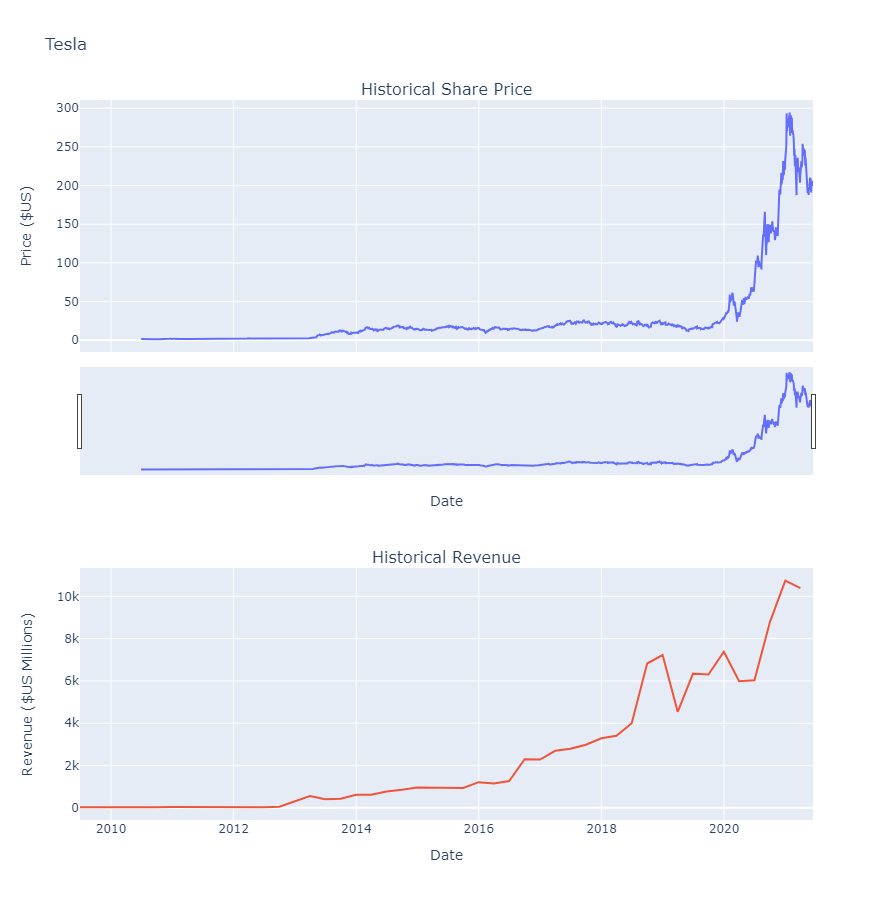

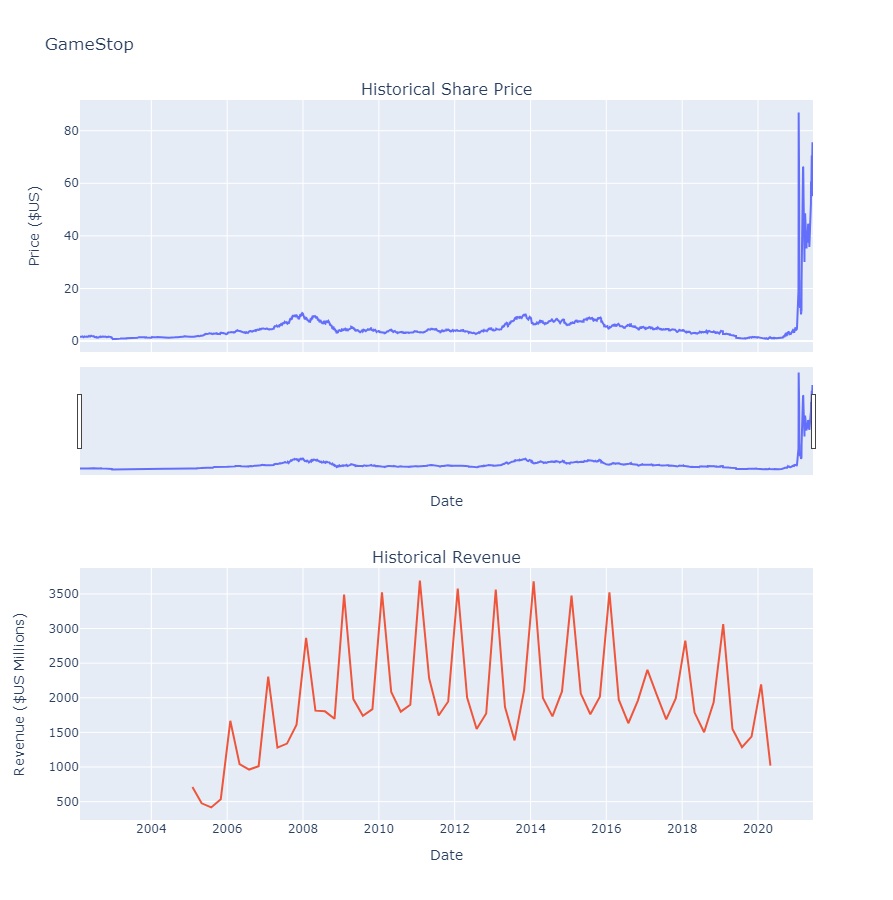

In [26]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    
# lET'S start our Project

# Question 1 - Use yfinance to Extract Stock Data
    
tesla = yf.Ticker("TSLA")
print(tesla)

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
print(tesla_data.head())


# Question 2 - WebScraping and BeautifulSoup

# Q2 - A
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text


# Q2 - B
soup = BeautifulSoup(html_data, 'html5lib')

#read_html_pandas_data = pd.read_html(url)
#tesla_revenue = read_html_pandas_data[1]

#tesla_revenue.head()

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
print(tesla_revenue)
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

print(tesla_revenue)

# Execute the following line to remove the comma and dollar sign from the Revenue column.
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

# Execute the following lines to remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.
tesla_revenue.tail()


# Question 3 - Use yfinance to Extract Stock Data

gme = yf.Ticker("GME")
print(gme)

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
print(gme_data.head())

# Question 4 - Use Webscraping to Extract GME Revenue Data

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text

# Q4 - B
soup = BeautifulSoup(html_data, 'html5lib')


gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
print(gme_revenue)
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

print(gme_revenue)


gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

# Question  5: Plot Tesla Stock Graph

make_graph(tesla_data, tesla_revenue, 'Tesla')

make_graph(gme_data, gme_revenue, 'GameStop')